<a href="https://colab.research.google.com/github/MaickYNG/Clasificador-de-Cilantro/blob/main/cilantro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Crear las carpetas para subir las imagenes
!mkdir cilantros

In [ ]:

%cd cilantros


/content/cilantros


In [ ]:
!unzip cilantro.zip

unzip:  cannot find or open cilantro.zip, cilantro.zip.zip or cilantro.zip.ZIP.


In [ ]:

!rm -rf /content/cilantros/cilantro.zip

In [ ]:
#Mostrar imagenes
!ls /content/cilantros | wc -l #668

0


In [ ]:
#Mostrar imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/cilantros'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

<Figure size 1500x1500 with 0 Axes>

In [ ]:


!mkdir dataset
!mkdir dataset/cilantro

In [ ]:
%cd /content/cilantros/dataset/cilantro


/content/cilantros/dataset/cilantro


In [ ]:
!unzip cilantro.zip

Archive:  cilantro.zip
  inflating: 11184832_1.jpg          
  inflating: 1366_2000.jpeg          
  inflating: 1366_2000.jpg           
  inflating: 1366_521.jpg            
  inflating: 1366_5212.jpeg          
  inflating: 196779419930656768.jpeg  
  inflating: 220px-Cilantro_leaf.jpg  
  inflating: 2912175_cilantroportada.jpg  
  inflating: 36I4EOBJOVAW5CBXTVT7JWJZPM.jpg  
  inflating: 39174730-primer-plano-de-una-pequeC3B1a-planta-de-cilantro-en-un-vivero.jpg  
  inflating: 4_129_coriandrum_sativum.jpg  
  inflating: 4255c37c-bd18-474d-a470-f0acad2b3708_1200x1200.jpg  
  inflating: 450_1000.jpeg           
  inflating: 519LSNPnvVL._AC_.jpg    
  inflating: 5314c063821d0.JPG.jpg   
  inflating: 534597debb3cb.jpg       
  inflating: 5e99834b5db1c.jpeg      
  inflating: 61695074-pequeC3B1a-planta-de-cilantro.jpg  
  inflating: 622129132b61d2649f3d5803.jpg  
  inflating: 9436812611_5e8e3749db_z.jpg  
  inflating: 9ad15747436a1be7b813a858e72e71be.jpg  
  inflating: a6bdbcdd-1d53-4b08-

In [ ]:
!rm -rf /content/cilantros/dataset/cilantro/cilantro.zip

In [ ]:
#Mostrar
!ls /content/cilantros/dataset/cilantro | wc -l

571


Found 368 images belonging to 1 classes.
Found 198 images belonging to 1 classes.


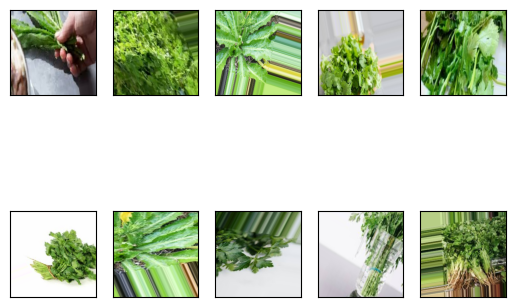

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.35 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/cilantros/dataset/', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/cilantros/dataset/', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 40

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/40
12/12 [==============================] - 37s 3s/step - loss: 1.6715 - accuracy: 0.5951 - val_loss: 1.7285 - val_accuracy: 0.5808
Epoch 2/40
12/12 [==============================] - 26s 2s/step - loss: 1.7157 - accuracy: 0.5489 - val_loss: 1.6478 - val_accuracy: 0.6313
Epoch 3/40
12/12 [==============================] - 26s 2s/step - loss: 1.7336 - accuracy: 0.5842 - val_loss: 1.7212 - val_accuracy: 0.6212
Epoch 4/40
12/12 [==============================] - 26s 2s/step - loss: 1.7206 - accuracy: 0.5788 - val_loss: 1.7300 - val_accuracy: 0.5758
Epoch 5/40
12/12 [==============================] - 28s 2s/step - loss: 1.7023 - accuracy: 0.5707 - val_loss: 1.6603 - val_accuracy: 0.5707
Epoch 6/40
12/12 [==============================] - 26s 2s/step - loss: 1.7363 - accuracy: 0.5598 - val_loss: 1.6806 - val_accuracy: 0.6515
Epoch 7/40
12/12 [==============================] - 26s 2s/step - loss: 1.6892 - accuracy: 0.5842 - val_loss: 1.7026 - val_accuracy: 0.5404
Epoch 8/40
12/12 [==

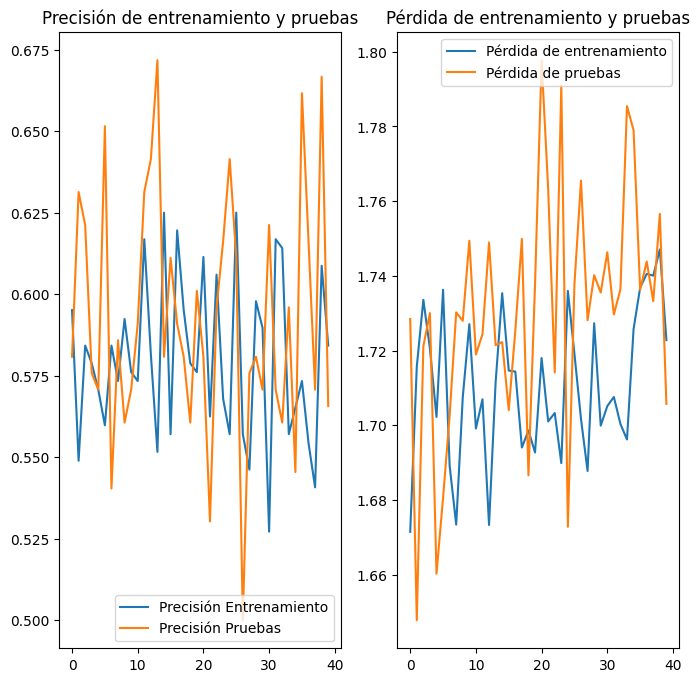

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(40)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
!pip install rich

In [ ]:
#0 = cilantro  /   1= no cilantro
from rich.console import Console
from rich.text import Text
console = Console()
url = 'https://s3.ppllstatics.com/diariovasco/www/multimedia/201907/24/media/cortadas/cilantro-kfjE-Rho1c2l9GCF2kie9dzjFNLP-1248x770@Diario%20Vasco-kuUG-Rho1c2l9GCF2kie9dzjFNLP-1248x770@Diario%20Vasco.jpg'
prediccion = categorizar (url)
if prediccion == 0:
  mensaje = Text("¡Es cilantro 100% autentico!", style="bright_green")
  console.print(mensaje)
else:
  mensaje = Text("¡No es cilantro :( !", style="bold red")
  console.print(mensaje)


1/1 [==============================] - 0s 48ms/step


¡Es cilantro 100% autentico!